In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\1.ushape.csv',header=None)

In [4]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

<Axes: xlabel='0', ylabel='1'>

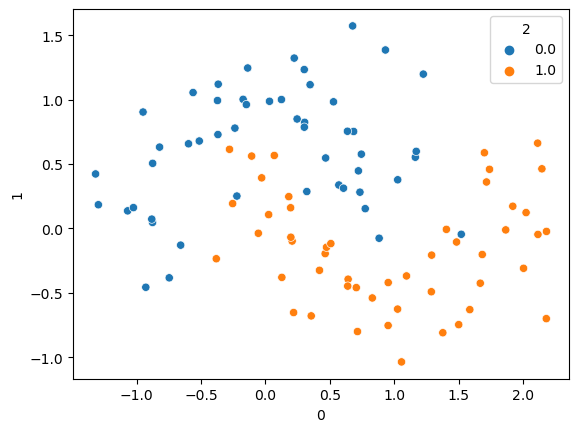

In [6]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [15]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.0003),bias_regularizer=L2(0.0003),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.0003),bias_regularizer=L2(0.0003)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.0003),bias_regularizer=L2(0.0003)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.0003),bias_regularizer=L2(0.0003)))

In [16]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 18ms/step - loss: 0.6523 - accuracy: 0.6296 - val_loss: 0.6399 - val_accuracy: 0.6667
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.8395 - val_loss: 0.7891 - val_accuracy: 0.5556
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4032 - accuracy: 0.8642 - val_loss: 0.7305 - val_accuracy: 0.6667
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3720 - accuracy: 0.8395 - val_loss: 0.7061 - val_accuracy: 0.6667
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3627 - accuracy: 0.8642 - val_loss: 0.7958 - val_accuracy: 0.6667
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8519 - val_loss: 0.7752 - val_accuracy: 0.6667
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8765 - val_loss: 0.6668 - val_accuracy: 0.7778
Epoch 8/20
17/17 [=

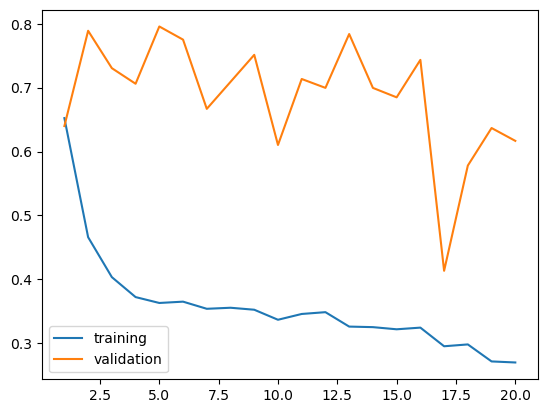

In [17]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

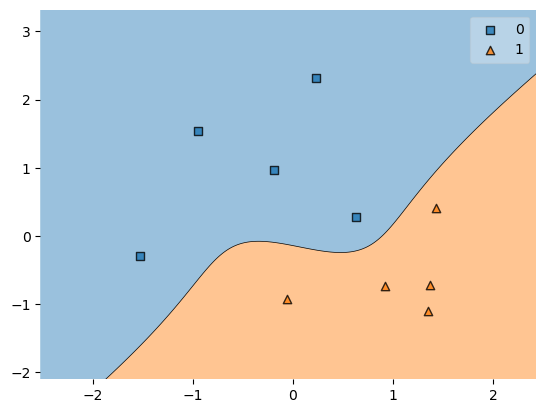

In [18]:
plot_decision_regions(x_testp,y_test.values,clf=model)